In [16]:
# =====================
# !!! LOAD TEMPLATE !!!
# =====================

# IMPORTS ---!
import gammalib
import ctools
import cscripts
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
import sys
from sys import argv

from module_analysis import *
from module_xml import *

workdir = '/home/ambra/Desktop/cluster-morgana/run0406_plots/run0406/' 
path = workdir + 'run0406_ID000126/'
datapath = path + 'data/'
simpath = path + 'sim/'
template = workdir + 'run0406_ID000126.fits'
model = workdir + 'run0406_ID000126.xml'

hdul =  fits.open(template)
hdul.info()

rootname ='gilmore_test'
pathout = datapath

# 41 energybins [GeV] ---!
energy=np.array(hdul[1].data)
# 71 timebins [s] ---!
time=np.array(hdul[2].data)
# spectra no EBL ---!
spectra=np.array(hdul[3].data)

Nt=len(time)
Ne=len(energy)

primary = hdul[0].header
trueRA = primary['RA']
trueDEC = primary['DEC']

print(trueRA, trueDEC)

# TIME GRID ---!
t=[0.0 for x in range(Nt+1)]
for i in range(Nt-1):
    t[i+1]=time[i][0]+(time[i+1][0]-time[i][0])/2
# tmax bin ---!
t[Nt]=time[Nt-1][0]+(time[Nt-1][0]-t[Nt-1])

#print('time bins')
#print(time)

# ENERGY GRID ---!
en=[1.0 for x in range(Ne+1)]
for i in range(Ne-1):
    en[i+1]=energy[i][0]+(energy[i+1][0]-energy[i][0])/2
# emax bin ---!
en[Ne]=energy[Ne-1][0]+(energy[Ne-1][0]-en[Ne-1])

#print('energy GeV bins')
print(energy.shape)

#print('spectra bins')
print(spectra.shape)

Filename: /home/ambra/Desktop/cluster-morgana/run0406_plots/run0406/run0406_ID000126.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  ENERGIES      1 BinTableHDU     13   41R x 1C   [E]   
  2  TIMES         1 BinTableHDU     13   71R x 1C   [E]   
  3  SPECTRA       1 BinTableHDU     92   71R x 41C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
33.057 -51.841
(41,)
(71,)


In [5]:
# ========================
# !!! LOAD GILMORE EBL !!!
# ========================

pathebl = '/home/ambra/Desktop/cluster-morgana/'
fiducial = pathebl + 'gilmore_tau_fiducial.csv'

df = pd.read_csv(fiducial)
cols = list(df.columns)
df.dropna()

z01 = np.array(df['0.10'])
E = np.array(df[cols[0]]) # MeV
E = E/1e3

print('Energy (GeV)')
#print(E)

Energy (GeV)


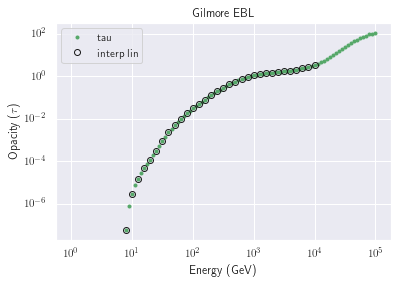

In [14]:
# =====================
# !!! INTERPOLATION !!!
# =====================

from scipy.interpolate import interp1d

y = np.zeros(shape=len(energy))+1
ylin = interp1d(E, z01)
#ycub = interp1d(E, z01, kind='cubic')
x = np.linspace(0, len(E), endpoint=True)

fig = plt.figure()
ax = plt.subplot(111, xscale='log', yscale='log')
plt.rc('text', usetex=True)
sns.set()

ax.plot(E, z01, '.', label='tau', c='g')
#ax.plot(energy, y, '+', label='model pnts')
ax.plot(energy, ylin(energy), 'o', c='k', markeredgecolor='k', markerfacecolor='none', label='interp lin')
#ax.plot(energy, ycub(energy), '*', c='r', markeredgecolor='k', markerfacecolor='none', label='interp cub')
ax.set_ylabel('Opacity ($\\tau$)')
ax.set_xlabel('Energy (GeV)')
ax.set_title('Gilmore EBL')
ax.legend(loc='best')

fig.savefig('gilmore_tau_interpolation.png')
plt.show()

In [15]:
# ===========================
# !!! EBL GILMORE SPECTRA !!!
# ===========================

tau_gilmore = np.array(ylin(energy))
print('Gilmore tau')
print(tau_gilmore, len(tau_gilmore))
ebl_gilmore = np.empty(len(spectra))

print(ebl_gilmore.shape, spectra.shape, tau_gilmore.shape)

for i in range(len(spectra)) :
    ebl_gilmore[i] = spectra[i] * np.exp(-tau_gilmore)

print('ebl spectra')
print(ebl_gilmore)

Gilmore tau
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.62372680e-08 2.92854020e-06 1.50544060e-05
 4.70802169e-05 1.19446927e-04 3.07728030e-04 8.68692641e-04
 2.26201075e-03 5.09533488e-03 1.00815104e-02 1.80759374e-02
 3.03609160e-02 4.94074070e-02 7.91155977e-02 1.24608417e-01
 1.91609186e-01 2.85076220e-01 4.07536117e-01 5.58201989e-01
 7.30427756e-01 9.11690640e-01 1.08786080e+00 1.24552500e+00
 1.37591730e+00 1.48374932e+00 1.58389169e+00 1.69458616e+00
 1.83785139e+00 2.03455562e+00 2.30843809e+00 2.70720717e+00
 3.34145500e+00] 41
(71,) (71,) (41,)


TypeError: invalid type promotion